In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirmeleri daha iyi hale getirmek için Seaborn teması kullanıldı
sns.set_theme(style="whitegrid")


In [19]:
df = pd.read_csv("HousingData.csv")

# İlk 5 satırı görüntüle
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
# Veri setinin genel bilgileri
df.info()

# Temel istatistiksel özeti
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
# Eksik verileri kontrol etme
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
# Eksik verileri sütunun medyan değeriyle doldur
df.fillna(df.median(), inplace=True)

### Düşük Gelirli Nüfus (%) ile Fiyat (MEDV) İlişkisi

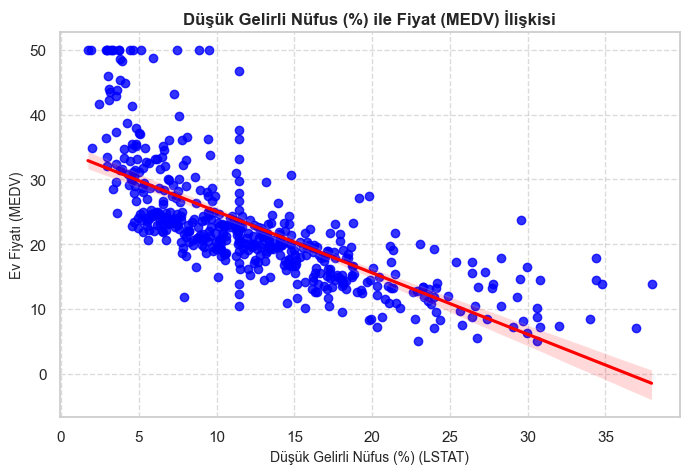

In [26]:
plt.figure(figsize=(8,5))
sns.regplot(x=df["LSTAT"], y=df["MEDV"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Başlık ve Etiketler
plt.title("Düşük Gelirli Nüfus (%) ile Fiyat (MEDV) İlişkisi", fontsize=12, fontweight="bold")
plt.xlabel("Düşük Gelirli Nüfus (%) (LSTAT)", fontsize=10)
plt.ylabel("Ev Fiyatı (MEDV)", fontsize=10)

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



### Oda Sayısı (RM) ile Fiyat (MEDV) İlişkisi

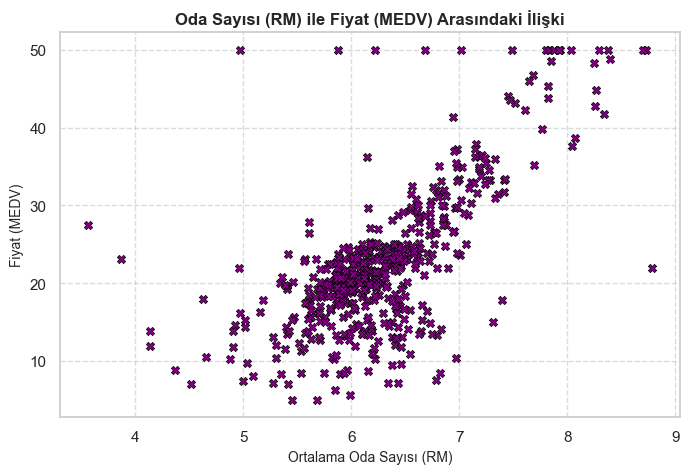

In [27]:
# Grafik Boyutu
plt.figure(figsize=(8,5))
# Scatter Plot ile özgün tasarım
sns.scatterplot(x=df["RM"], y=df["MEDV"], color="purple", marker="X", edgecolor="black")

# Başlık ve Etiketler
plt.title("Oda Sayısı (RM) ile Fiyat (MEDV) Arasındaki İlişki", fontsize=12, fontweight="bold")
plt.xlabel("Ortalama Oda Sayısı (RM)", fontsize=10)
plt.ylabel("Fiyat (MEDV)", fontsize=10)

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [28]:
# Veri setini temizle ve kaydet
df.to_csv("cleaned_boston_housing.csv", index=False)
print("Temizlenmiş veri seti 'cleaned_boston_housing.csv' olarak kaydedildi.")


Temizlenmiş veri seti 'cleaned_boston_housing.csv' olarak kaydedildi.
